In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression #to build a linear regression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime


import matplotlib.dates as mdates #to format dates in plot 
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')
#test_df = pd.read_csv('test.csv')

In [5]:
train_df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571441 entries, 0 to 571440
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    571441 non-null  int64  
 1   Age                   562493 non-null  float64
 2   Gender                571441 non-null  object 
 3   Annual Income         549869 non-null  float64
 4   Marital Status        562508 non-null  object 
 5   Number of Dependents  519147 non-null  float64
 6   Education Level       571441 non-null  object 
 7   Occupation            401045 non-null  object 
 8   Health Score          536280 non-null  float64
 9   Location              571441 non-null  object 
 10  Policy Type           571441 non-null  object 
 11  Previous Claims       398179 non-null  float64
 12  Vehicle Age           571437 non-null  float64
 13  Credit Score          505740 non-null  float64
 14  Insurance Duration    571441 non-null  float64
 15  

In [25]:
def start_date_to_months(date_column):
    date=date_column.split(' ')[0]
    date=datetime.strptime(date, '%Y-%m-%d')
    current_date=datetime.now()
    months_apart=(current_date.year-date.year)*12+(current_date.month-date.month)
    return months_apart

In [29]:
train_df['Duration_of_policy_mths']=train_df['Policy Start Date'].apply(start_date_to_months)
train_df.drop(columns='Policy Start Date', inplace=True)

In [33]:
# #change date to date format
# #Passing errors='coerce' will force an out-of-bounds date/non dates to NaT
# train_df['Policy Start Date'] = pd.to_datetime(train_df['Policy Start Date'], errors='coerce')
# train_df.info()

In [37]:
categorical_columns = train_df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = train_df.select_dtypes(include=['number']).columns.tolist()

print('Categorical :',categorical_columns,'\n','Numerical  :',numerical_columns)

Categorical : ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type'] 
 Numerical  : ['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Premium Amount', 'Duration of policy']


In [39]:
# Uniq Values of Categorical
for col in categorical_columns:
    print(col,'\n',train_df[col].unique(),'\n',"-" * 30)  

Gender 
 ['Female' 'Male'] 
 ------------------------------
Marital Status 
 ['Married' 'Divorced' 'Single' nan] 
 ------------------------------
Education Level 
 ["Bachelor's" "Master's" 'High School' 'PhD'] 
 ------------------------------
Occupation 
 ['Self-Employed' nan 'Employed' 'Unemployed'] 
 ------------------------------
Location 
 ['Urban' 'Rural' 'Suburban'] 
 ------------------------------
Policy Type 
 ['Premium' 'Comprehensive' 'Basic'] 
 ------------------------------
Customer Feedback 
 ['Poor' 'Average' 'Good' nan] 
 ------------------------------
Smoking Status 
 ['No' 'Yes' nan] 
 ------------------------------
Exercise Frequency 
 ['Weekly' 'Monthly' 'Daily' 'Rarely' nan] 
 ------------------------------
Property Type 
 ['House' 'Apartment' 'Condo' nan] 
 ------------------------------


In [41]:
# Uniq Values of 
for col in numerical_columns:
    print(col,'\n',train_df[col].unique(),'\n',"-" * 30)  

id 
 [     0      1      2 ... 571438 571439 571440] 
 ------------------------------
Age 
 [19. 39. 23. 21. 29. 41. 48. 44. 56. 25. 40. 18. 59. 34. 22. 46. 49. 42.
 43. 64. 52. 37. 58. 50. 35. 61. 31. 54. 45. 30. 33. 28. 62. 53. 47. 27.
 nan 38. 63. 32. 36. 20. 51. 55. 57. 24. 60. 26.] 
 ------------------------------
Annual Income 
 [10049. 31678. 25602. ... 36153. 58281. 93434.] 
 ------------------------------
Number of Dependents 
 [ 1.  3.  2.  0.  4. nan] 
 ------------------------------
Health Score 
 [22.59876067 15.56973099 47.17754929 ... 16.96639693 20.18082222
 27.82815658] 
 ------------------------------
Previous Claims 
 [ 2.  1.  0. nan  3.  4.  5.  6.  7.  8.  9.] 
 ------------------------------
Vehicle Age 
 [17. 12. 14.  0.  8.  4. 11. 10.  9.  6. 19.  3. 15. 16.  5.  7. 18.  1.
  2. 13. nan] 
 ------------------------------
Credit Score 
 [372. 694.  nan 367. 598. 614. 807. 398. 685. 635. 431. 597. 511. 498.
 584. 420. 595. 799. 773. 798. 543. 416. 425. 486. 795. 

In [45]:
train_df.describe()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Duration of policy
count,571441.000000,562493.000000,549869.000000,519147.000000,536280.000000,398179.000000,571437.000000,505740.000000,571441.000000,571440.000000,571441.000000
mean,285720.000000,41.146526,32758.134516,2.008595,25.600680,1.003488,9.577446,592.803227,5.016401,1102.452508,36.035235
std,164960.951925,13.536676,32186.091020,1.415977,12.194469,0.982779,5.774879,150.058180,2.594710,865.776942,17.144540
min,0.000000,18.000000,2.000000,0.000000,2.012237,0.000000,0.000000,300.000000,1.000000,20.000000,6.000000
25%,142860.000000,30.000000,7991.000000,1.000000,15.917789,0.000000,5.000000,468.000000,3.000000,513.000000,21.000000
50%,285720.000000,41.000000,23952.000000,2.000000,24.569334,1.000000,10.000000,595.000000,5.000000,872.000000,36.000000
75%,428580.000000,53.000000,44641.000000,3.000000,34.493780,2.000000,15.000000,721.000000,7.000000,1510.000000,51.000000
max,571440.000000,64.000000,149997.000000,4.000000,58.886035,9.000000,19.000000,849.000000,9.000000,4994.000000,66.000000


In [49]:
train_df.isna().sum()

id                           0
Age                       8948
Gender                       0
Annual Income            21572
Marital Status            8933
Number of Dependents     52294
Education Level              0
Occupation              170396
Health Score             35161
Location                     0
Policy Type                  0
Previous Claims         173262
Vehicle Age                  4
Credit Score             65701
Insurance Duration           0
Customer Feedback        37150
Smoking Status               1
Exercise Frequency           1
Property Type                1
Premium Amount               1
Duration of policy           0
dtype: int64

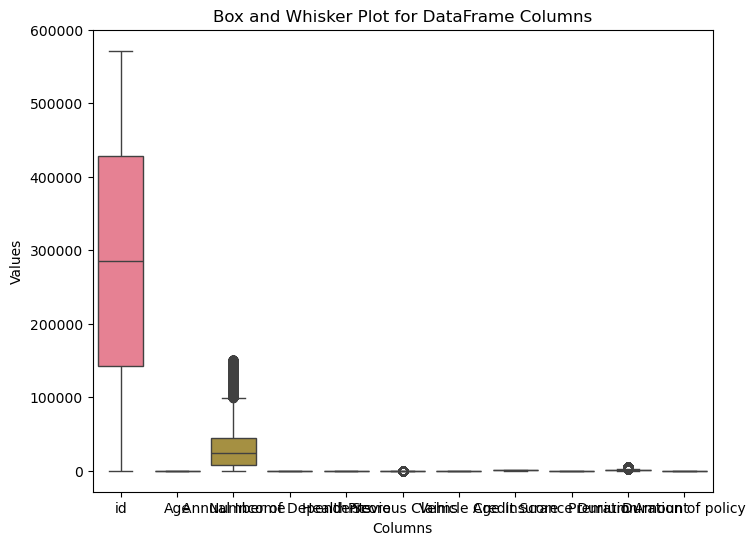

In [51]:
# Create a box and whisker plot
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(data=train_df)  # Create the box plot
plt.title('Box and Whisker Plot for DataFrame Columns')  # Add a title
plt.xlabel('Columns')  # Label for the x-axis
plt.ylabel('Values')  # Label for the y-axis
plt.show()  # Display the plot

C:\Users\roopy\AppData\Local\Temp\ipykernel_1756\1190329438.py:10: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()  # Adjust layout to avoid overlapping


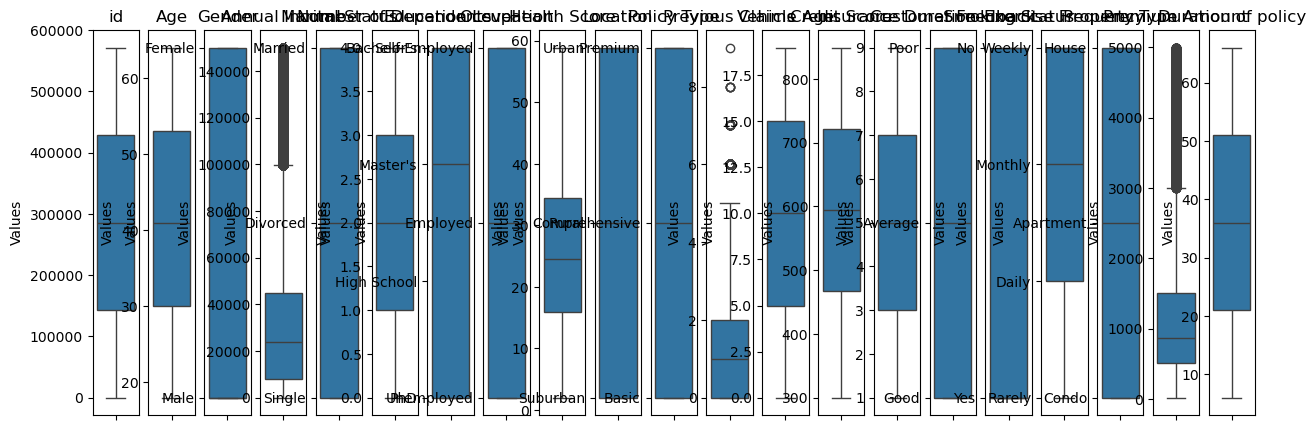

In [59]:
# Create subplots
fig, axes = plt.subplots(1, len(train_df.columns), figsize=(15, 5))

# Plot each column in a separate subplot
for i, column in enumerate(train_df.columns):
    sns.boxplot(y=train_df[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_ylabel('Values')

plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

In [ ]:
#reduce outliers

In [30]:
def Categorical_Encode(df):
    # Select categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    # If no categorical columns are found, print a warning and return the DataFrame
    if len(categorical_columns) == 0:
        print("Warning: No categorical columns found in the DataFrame.")
        return df
    
    # Fill missing values with the most frequent value using SimpleImputer
    imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_columns] = imputer.fit_transform(df[categorical_columns])
    
    # Apply Label Encoding to each categorical column
    for col in categorical_columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    
    return df

#Replaced with earlier function
# def fix_dates(df, date_column='Policy Start Date'):
#     # Check if the specified date column exists in the DataFrame
#     if date_column not in df.columns:
#         print(f"Warning: '{date_column}' column not found in the DataFrame.")
#         return df
    
#     # Convert the date column to datetime format, coercing errors to NaT (Not a Time)
#     df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    
#     # Check for missing or invalid dates in the date column
#     if df[date_column].isnull().any():
#         print(f"Warning: Missing or invalid dates found in the '{date_column}' column.")
    
#     # Extract year, month, and day from the date column
#     df['Year'] = df[date_column].dt.year
#     df['Month'] = df[date_column].dt.month
#     df['Day'] = df[date_column].dt.day
    
#     # Drop the original date column
#     df.drop(date_column, axis=1, inplace=True)
    
#     return df


def fill_missing_with_iqr(df):
    
    numeric_columns = df.select_dtypes(include=['number']).columns
    
    if len(numeric_columns) == 0:
        print("Warning: No numerical columns found in the DataFrame.")
        return df
    
    for col in numeric_columns:
        if df[col].isnull().any():
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            random_values = np.random.uniform(lower_bound, upper_bound, size=df[col].isnull().sum())
            df.loc[df[col].isnull(), col] = random_values
    
    return df

### Linear Regression

In [29]:
### Have to change date col, impute missing values, and labelencode/onehotencode categorical, 
### otherwise LinearRegression cannot work

In [31]:
#date
clean_train = fix_dates(train_df)

# categorical
clean_train = Categorical_Encode(clean_train)

# numeric
clean_train = fill_missing_with_iqr(clean_train) 

In [32]:
clean_train

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Year,Month,Day
0,0,19.0,0,10049.0,1,1.00000,0,1,22.598761,2,...,372.000000,5.0,2,0,3,2,2869.00000,2023.000000,12.000000,23.00000
1,1,39.0,0,31678.0,0,3.00000,2,0,15.569731,0,...,694.000000,2.0,0,1,1,2,1483.00000,2023.000000,6.000000,12.00000
2,2,23.0,1,25602.0,0,3.00000,1,1,47.177549,1,...,766.738831,3.0,1,1,3,2,567.00000,2023.000000,9.000000,30.00000
3,3,21.0,1,141855.0,1,2.00000,0,0,10.938144,0,...,367.000000,1.0,2,1,0,0,765.00000,2024.000000,6.000000,12.00000
4,4,21.0,1,39651.0,2,1.00000,0,1,20.376094,0,...,598.000000,4.0,2,1,3,2,2022.00000,2021.000000,12.000000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571436,571436,64.0,1,26083.0,0,0.00000,0,0,25.912175,1,...,805.000000,6.0,1,0,3,1,811.00000,2020.000000,9.000000,30.00000
571437,571437,26.0,0,44780.0,1,4.59943,0,1,15.437927,1,...,1082.433990,7.0,0,1,3,1,450.00000,2020.000000,7.000000,3.00000
571438,571438,41.0,1,7087.0,0,0.00000,2,1,16.966397,2,...,543.000000,5.0,0,0,2,1,825.00000,2021.000000,1.000000,18.00000
571439,571439,37.0,0,27299.0,1,2.00000,1,0,20.180822,0,...,405.000000,4.0,1,1,2,1,1798.00000,2021.000000,1.000000,17.00000


In [33]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select all columns except the last one
columns_to_normalize = clean_train.columns.difference(['Premium Amount']) 

# Normalize the selected columns
clean_train[columns_to_normalize] = scaler.fit_transform(clean_train[columns_to_normalize])

In [ ]:
print(clean_train)

In [ ]:
# Drop features with low correlation with premium amount
# And drop features highly correlated with each other, keep only one of them 

# Correlation matrix
correlation_matrix = clean_train.corr()
print(correlation_matrix['Premium Amount'].sort_values(ascending=False))  # Check correlation with the target

There is weak linear correlation between premium amount and the features. Thus, linear regression might not yield good result. 

In [ ]:
# Log transform response variable 
# Adding a small constant (e.g., 1) to handle zeros

clean_train['Premium Amount'] = np.log(clean_train['Premium Amount'] + 1)

In [15]:
total_nan = clean_train.isnull().sum().sum()
print(total_nan)

#remove nan response variable otherwise will have error during linear regression
clean_train = clean_train.dropna(subset=['Premium Amount'])

0


In [16]:
# Correlation matrix
correlation_matrix = clean_train.corr()
print(correlation_matrix['Premium Amount'].sort_values(ascending=False))  # Check correlation with the target

Premium Amount          1.000000
Previous Claims         0.022028
Health Score            0.012022
Month                   0.006666
Marital Status          0.003789
Occupation              0.003394
Gender                  0.001663
Location                0.001478
Vehicle Age             0.000294
Day                     0.000228
Education Level        -0.000079
Property Type          -0.000155
Number of Dependents   -0.000400
Policy Type            -0.000848
Insurance Duration     -0.000885
Smoking Status         -0.001421
id                     -0.001688
Exercise Frequency     -0.001690
Age                    -0.003600
Customer Feedback      -0.005533
Annual Income          -0.011791
Year                   -0.012309
Credit Score           -0.021141
Name: Premium Amount, dtype: float64


In [114]:
# alternative code
# X = train_df.iloc[:,:-1]
# y = train_df.iloc[:,-1]

X = clean_train.drop(columns=['id', 'Premium Amount', 'Day', 'Month', 'Customer Feedback']) #note cannot feed dates into linear regression
y = clean_train['Premium Amount']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [115]:
reg = LinearRegression(fit_intercept = True) #initialize
reg = LinearRegression().fit(X_train, y_train)

In [116]:
y_pred = reg.predict(X_test)

In [117]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
results = []
results.append((r2, rmse, mae))
results

[(0.010366647236876858, 0.1659473062332887, 0.114281934261242)]

In [38]:
# view pred vs actual
type(y_pred)

numpy.ndarray

In [118]:
y_pred_series = pd.Series(y_pred)
y_test_pred = pd.DataFrame({'actual': y_test.reset_index(drop=True), 
                             'pred': y_pred_series.reset_index(drop=True)})
print(y_test_pred)

          actual      pred
0       1.950626  2.031885
1       1.534194  2.006077
2       1.743706  2.022350
3       1.754252  2.010341
4       2.041155  2.025897
...          ...       ...
114283  2.128306  2.044134
114284  2.083621  2.017514
114285  2.027052  2.033776
114286  1.998560  2.004518
114287  2.118487  2.017279

[114288 rows x 2 columns]


In [119]:
# model coefficient
reg.coef_

array([-3.08353509e-03, -3.21860378e-04, -9.02767168e-02,  2.38270737e-03,
       -1.53986893e-04, -1.95486287e-04,  7.50300524e-04,  1.48023952e-02,
        9.40636823e-04, -4.95278921e-04,  2.19490893e-02, -1.69362619e-04,
       -4.97394563e-02, -4.04099664e-04, -1.00823290e-04, -8.50133198e-04,
        7.23268601e-05, -7.36194563e-03])

In [120]:
#model intercept
reg.intercept_

2.066183048647526

### XGBoost

In [121]:
import xgboost as xgb
from xgboost import XGBRegressor

In [122]:
reg = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7)
reg.fit(X_train, y_train)

ImportError: cannot import name 'Float32Dtype' from 'pandas' (C:\Users\SohLiQin\anaconda3\lib\site-packages\pandas\__init__.py)